In [1]:
!pip install tensorflow

# Loading mnist dataset from keras

In [2]:
from tensorflow.keras import datasets

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
print(f'shape={x_train.shape}')
print(f'dim={x_train.ndim}')

shape=(60000, 28, 28)
dim=3


In [6]:
x_train[0].shape

(28, 28)

In [7]:
#1st simple in datasets
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

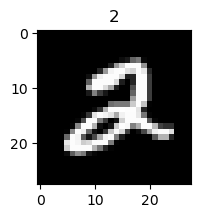

In [8]:
from matplotlib import pyplot as plt
img_index=5
plt.figure(figsize=(2,2))
plt.imshow(x_train[img_index],cmap='gray')
plt.title(y_train[img_index])
plt.show()

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
import numpy as np

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# reshapping 28*28 into 784

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1] * x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1] * x_test.shape[2])

In [15]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

#  build ANN architecture with followings:

1. Input Layer with 784 nodes
2. 1st Hidden Layer with 500 neurons with relu activation function
3. 2st Hidden Layer with 250 neurons with relu activation function
4. Output Layer with 10 neurons with softmax activation function
5.loss function sparse_categorical_crossentropy(one_hot encoding is not required) or categorical_crossentropy(one_hot encoding is required)
6.Optimizer adam

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense #for output we use Dense only

In [17]:
model=Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 10)                2510      
                                                                 
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=10, batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 16s 31ms/step - loss: 2.2668 - accuracy: 0.9038 - val_loss: 0.4607 - val_accuracy: 0.9278
Epoch 2/10
469/469 [==============================] - 14s 30ms/step - loss: 0.2809 - accuracy: 0.9530 - val_loss: 0.2874 - val_accuracy: 0.9466
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1553 - accuracy: 0.9667 - val_loss: 0.2841 - val_accuracy: 0.9490
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1233 - accuracy: 0.9714 - val_loss: 0.2196 - val_accuracy: 0.9607
Epoch 5/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0899 - accuracy: 0.9772 - val_loss: 0.2250 - val_accuracy: 0.9602
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0970 - accuracy: 0.9764 - val_loss: 0.2308 - val_accuracy: 0.9560
Epoch 7/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0870 - accuracy: 0.9779 - val_loss: 0.1771 - val_accuracy:

In [21]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense #for output we use Dense only

(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

x_train= x_train.reshape(x_train.shape[0],x_train.shape[1] * x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1] * x_test.shape[2])

model=Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
H=model.fit(x_train,y_train,epochs=10, batch_size=128,validation_data=(x_test,y_test))



Epoch 1/10
469/469 [==============================] - 16s 31ms/step - loss: 2.4604 - accuracy: 0.8946 - val_loss: 0.4436 - val_accuracy: 0.9295
Epoch 2/10
469/469 [==============================] - 14s 30ms/step - loss: 0.2760 - accuracy: 0.9494 - val_loss: 0.2501 - val_accuracy: 0.9509
Epoch 3/10
469/469 [==============================] - 14s 31ms/step - loss: 0.1569 - accuracy: 0.9639 - val_loss: 0.2358 - val_accuracy: 0.9548
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1164 - accuracy: 0.9714 - val_loss: 0.2485 - val_accuracy: 0.9559
Epoch 5/10
469/469 [==============================] - 14s 31ms/step - loss: 0.1076 - accuracy: 0.9737 - val_loss: 0.2116 - val_accuracy: 0.9577
Epoch 6/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0907 - accuracy: 0.9770 - val_loss: 0.1775 - val_accuracy: 0.9660
Epoch 7/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0822 - accuracy: 0.9788 - val_loss: 0.2157 - val_accuracy:

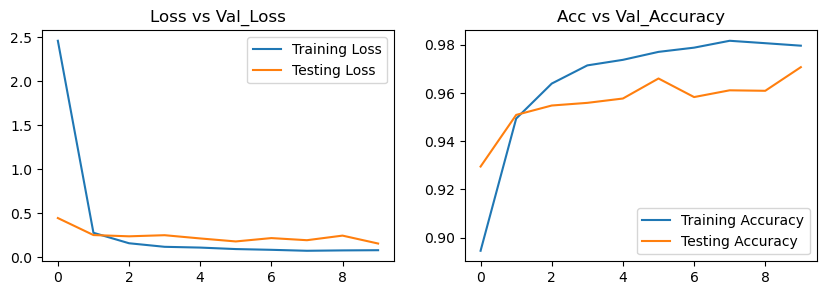

In [22]:
#plot for loss and accuracy
#H.history.keys()
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(H.epoch, H.history['loss'] ,label='Training Loss')
plt.plot(H.epoch, H.history['val_loss'] ,label='Testing Loss')
plt.title('Loss vs Val_Loss')
plt.legend()



plt.subplot(1,2,2)
plt.plot(H.epoch, H.history['accuracy'], label='Training Accuracy')
plt.plot(H.epoch, H.history['val_accuracy'], label='Testing Accuracy')
plt.title('Acc vs Val_Accuracy')
plt.legend()
plt.show()

In [23]:
# simplification of above code

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

model=Sequential()
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
H1=model.fit(x_train,y_train,epochs=2, batch_size=128,validation_data=(x_test,y_test))

Epoch 1/2
469/469 [==============================] - 16s 31ms/step - loss: 2.2573 - accuracy: 0.8962 - val_loss: 0.4143 - val_accuracy: 0.9245
Epoch 2/2
469/469 [==============================] - 14s 30ms/step - loss: 0.2468 - accuracy: 0.9513 - val_loss: 0.2617 - val_accuracy: 0.9434


In [25]:
pred_proba=model.predict(x_test[:5])

1/1 [==============================] - 0s 238ms/step


In [27]:
import numpy as np

pred=[]
for proba in pred_proba:
    pred.append(np.argmax(proba))
print(pred)

[7, 2, 1, 0, 4]


In [28]:
# Practice on different datasets

In [29]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [30]:
x_train.shape

(50000, 32, 32, 3)

In [64]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

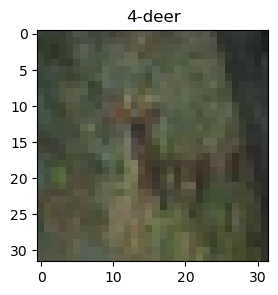

In [63]:
lable_names={
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}



plt.figure(figsize=(10,3))
plt.imshow(x_train[10])
lable=y_train[10][0]
lable_name=lable_names[lable]
plt.title(f'{lable}-{lable_name}')
plt.show()

In [71]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
model_bb=Sequential()
model_bb.add(Flatten())
model_bb.add(Dense(1000,activation='relu'))
model_bb.add(Dense(500,activation='relu'))
model_bb.add(Dense(10,activation='softmax'))

model_bb.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_bb.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

MemoryError: Unable to allocate 146. MiB for an array with shape (50000, 32, 32, 3) and data type uint8

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [18]:
def build_cnn(input_shape1,num_classess):
    cnn_model=Sequential()
    cnn_model.add(Conv2D(5,kernel_size=(3,3), input_shape=input_shape1))
    cnn_model.add(MaxPooling2D(pool_size=(2,2)))
    
    cnn_model.add(Conv2D(10,kernel_size=(3,3)))
    cnn_model.add(MaxPooling2D(pool_size=(2,2)))
    
    cnn_model.add(Flatten())
    cnn_model.add(Dense(500,activation='relu'))
    cnn_model.add(Dense(100,activation='relu'))
    cnn_model.add(Dense(10,activation='softmax'))
    
    return cnn_model

In [19]:
from tensorflow.keras import datasets
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
cnn_model=build_cnn((32,32,3))

TypeError: build_cnn() missing 1 required positional argument: 'num_classess'

In [23]:
#plot_model(cnn_model,show_shape=True,show_layer_activations=True)

In [26]:
cnn_model=build_cnn((32,32,3), num_classess=10)
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
cnn_model.fit(x_train,y_train,epochs=`5,validation_data=(x_test,y_test),batch_size=250)

Epoch 1/5
200/200 [==============================] - 32s 150ms/step - loss: 4.1772 - acc: 0.2085 - val_loss: 2.0322 - val_acc: 0.2661
Epoch 2/5
200/200 [==============================] - 29s 147ms/step - loss: 1.8978 - acc: 0.3148 - val_loss: 1.8358 - val_acc: 0.3448
Epoch 3/5
200/200 [==============================] - 29s 148ms/step - loss: 1.6632 - acc: 0.4049 - val_loss: 1.5964 - val_acc: 0.4331
Epoch 4/5
200/200 [==============================] - 29s 147ms/step - loss: 1.4557 - acc: 0.4778 - val_loss: 1.5065 - val_acc: 0.4727
Epoch 5/5
200/200 [==============================] - 29s 147ms/step - loss: 1.3434 - acc: 0.5166 - val_loss: 1.4505 - val_acc: 0.4897
